In [1]:
import copy
from keypress_recognition.models import black_bundle_model as bmodel, white_bundle_model as wmodel
from keypress_recognition import dataset
import numpy as np
import matplotlib.pyplot as plt

# of K_train: 90089
# of K_test: 3820
# of K_val: 4949


In [2]:
def visualize_keys(note):
    """
    note: bool
    return: str
    """
    return ("Pressed" if note else "Not Pressed")
visualize_keys(True)

'Pressed'

Samples from X_train: 


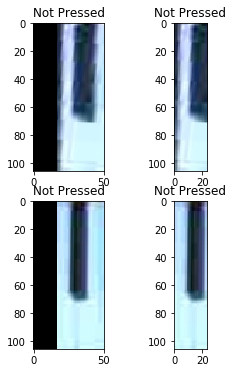

Samples from X_test: 


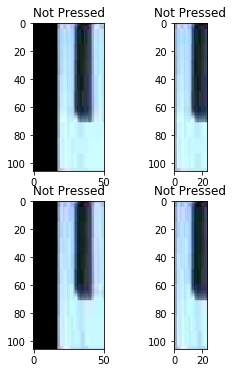

Samples from X_val: 


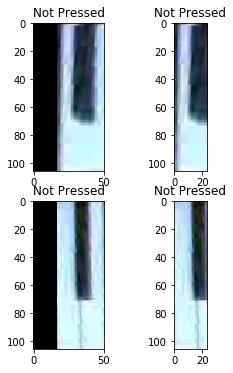

In [3]:
# print several images with labels

for _type in ['train', 'test', 'val']:

    print(f'Samples from X_{_type}: ')

    fig, axarr = plt.subplots(2, 2, figsize=[4, 6])

    for i in range(0, 2):
        imgw, imgb, notew, noteb = dataset.get_sample(_type, method=1)
        axarr[i, 0].imshow(imgw[0])
        axarr[i, 0].set_title(visualize_keys(notew[0]))
        axarr[i, 1].imshow(imgb[0])
        axarr[i, 1].set_title(visualize_keys(noteb[0]))

    plt.show()

In [4]:
bmodel.train(dataset, batch_size=32, num_epochs=20,
                      learning_rate=1e-3,
                      best_path='keypress_recognition/best_black_bundle_model.tar',
                      current_path='keypress_recognition/current_black_bundle.tar',
                      method=1, key_type='black')

Accuracy Matrix: both_0, pred_0_but_out_1, pred_1_but_out_0, both_1
Epoch 1/20


IntProgress(value=0, max=90089)

(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
(36, 106, 24, 3)
torch.Size([1152, 3, 106, 24])
torch.Size([32, 36])


KeyboardInterrupt: 

In [ ]:
wmodel.train(dataset, batch_size=32, num_epochs=20,
                      learning_rate=1e-3,
                      best_path='keypress_recognition/best_white_bundle_model.tar',
                      current_path='keypress_recognition/current_white_bundle.tar',
                      method=1, key_type='white')

In [ ]:
Xw, Xb, _, _ = dataset.get_sample('train', method=1)
fig, axarr = plt.subplots(1, 2, figsize=[16, 16])
axarr[0].imshow(Xw)
axarr[1].imshow(Xb)

Xw = np.transpose(Xw, [2, 0, 1])[None]
Xb = np.transpose(Xb, [2, 0, 1])[None]
yw = wmodel.evaluate(Xw)[0]
yb = bmodel.evaluate(Xb)[0]
axarr[0].set_title(visualize_keys(yw))
axarr[1].set_title(visualize_keys(yb))

plt.show()